In [20]:
from music21 import *
from IPython.display import Image


def music(notes: str, midi=False, swing=False):
    s = stream.Score()
    part = stream.Part()
    info_pos = []
    for i in range(0, len(notes)):
        if notes[i] == "^":
            info_pos.append(i)
    info_string = notes[info_pos[0] + 1 : info_pos[1]]
    info = info_string.split(" ")
    if info[0].lower() == "treble":
        part.append(clef.TrebleClef())
    elif info[0].lower() == "bass":
        part.append(clef.BassClef())
    elif info[0].lower() == "None":
        part.append(clef.NoClef())
    keys = [
        ["cb", -7],
        ["gb", -6],
        ["db", -5],
        ["ab", -4],
        ["eb", -3],
        ["bb", -2],
        ["f", -1],
        ["c", 0],
        ["g", 1],
        ["d", 2],
        ["a", 3],
        ["e", 4],
        ["b", 5],
        ["f#", 6],
        ["c#", 7],
    ]
    for k in keys:
        if info[1].lower() == k[0]:
            part.append(key.KeySignature(k[1]))
    if info[2] != "0/0":
        part.append(meter.TimeSignature(info[2]))
    notes = notes[info_pos[1] + 1 :]

    if info[2] != "0/0":
        split_notes = notes.split(" ")
        for n in split_notes:
            if n[0] == "!":
                part.append(harmony.ChordSymbol(n[1:]))
            elif n == "^":
                part.append(layout.SystemLayout(isNew=True))
            else:
                is_chord = False
                is_tie = "none"
                note_and_length = n.split("/")
                if "(" in note_and_length[0]:
                    is_chord = True
                    chord_name = (
                        note_and_length[0].replace("(", "").replace(")", "").split("$")
                    )
                else:
                    note_name = note_and_length[0]
                if "{" in note_and_length[1]:
                    is_tie = "start"
                    note_and_length[1] = note_and_length[1].replace("{", "")
                if "}" in note_and_length[1]:
                    is_tie = "stop"
                    note_and_length[1] = note_and_length[1].replace("}", "")
                if "*" in note_and_length[1]:
                    length_and_col = note_and_length[1].split("*")
                    note_length = length_and_col[0]
                    note_col = length_and_col[1]
                else:
                    note_length = note_and_length[1]
                    note_col = ""
                if note_length in ["0.3", ".3"]:
                    note_length = 0.333333333
                else:
                    note_length = float(note_length)
                if is_chord:
                    add_n = chord.Chord(chord_name, quarterLength=note_length)
                else:
                    if note_name.lower() == "r":
                        add_n = note.Rest(quarterLength=note_length)
                    elif note_name in ["slash", "s"]:
                        add_n = note.Unpitched()
                        add_n.notehead = "slash"
                        add_n.stemDirection = "noStem"
                        add_n.volume.velocity = 0
                    else:
                        add_n = note.Note(note_name, quarterLength=note_length)
                if is_tie != "none":
                    add_n.tie = tie.Tie(is_tie)
                if note_col != "":
                    add_n.style.color = note_col

                part.append(add_n)

        if swing:
            for thing in part:
                if isinstance(thing, note.Note):
                    if thing.quarterLength == 0.5:
                        if ".5" in str(thing.beat):
                            thing.quarterLength = 0.25
                            thing.offset += 0.25
                        if ".0" in str(thing.beat):
                            thing.quarterLength = 0.75
                    elif thing.quarterLength == 1.5:
                        if ".0" in str(thing.beat):
                            thing.quarterLength = 1.75

    s.append(tempo.MetronomeMark(number=120))
    s.append(part)

    if midi:
        return s.show("midi")
    else:
        return Image(filename=s.write("musicxml.png"))

# Fundamentals
## The Staff

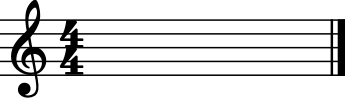

In [2]:
notes = "^none c 0/0^"
music(notes, False, False)

The staff consist of the horizontal lines upon which notes are drawn. Let's take a look at what note each line is.

#### What note is each line?

Sheet Music


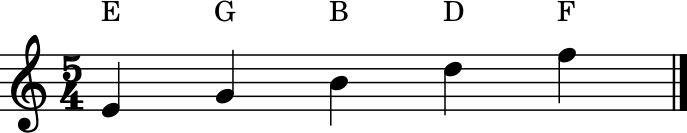

In [8]:
notes = "^treble c 5/4^"
notes += "!e e4/1 !g g4/1 !b b4/1 !d d5/1 !f f5/1"
print("Sheet Music")
music(notes, False)

In [10]:
notes = "^treble c 5/4^"
notes += "e4/1 g4/1 b4/1 d5/1 f5/1"
print("Play Audio")
music(notes, True)

Play Audio


Each space between lines are notes as well.

#### What note is each space between lines?

Sheet Music


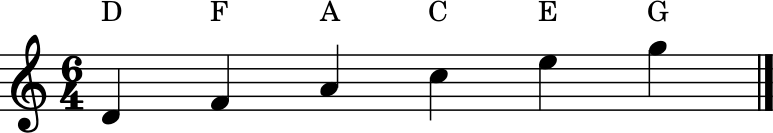

In [21]:
notes = "^treble c 6/4^"
notes += "!d d4/1 !f f4/1 !a a4/1 !c c5/1 !e e5/1 !g g5/1"
print("Sheet Music")
music(notes)

In [22]:
notes = "^treble c 6/4^d4/1 f4/1 a4/1 c5/1 e5/1 g5/1"
print("Play Audio")
music(notes, True)

Play Audio
